#### Diabetes(당뇨병) 데이터와 Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


### 1. Data

#### 1-1. Data Load

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [3]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

- 1) age : 나이
- 2) sex : 성별
- 3) bmi : body mass index
- 4) bp : Average blood pressure
- 5) 혈청에 대한 6가지 지표들 : S1, S2, S3, S4, S5, S6

In [4]:
data, target = diabetes['data'], diabetes['target']

In [5]:
data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [6]:
target[0]

151.0

#### 1-2. Data EDA

In [7]:
df = pd.DataFrame(data, columns=diabetes['feature_names'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [8]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


#### 1-3. Data Split

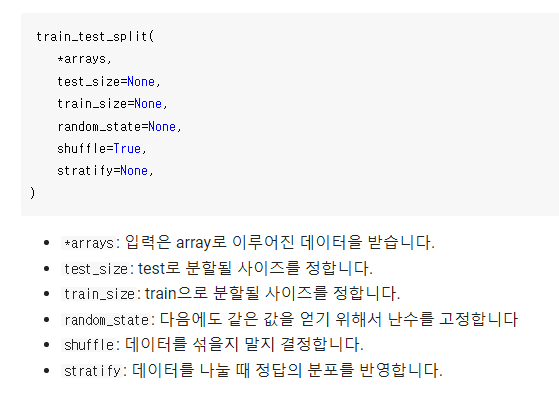

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3)

In [11]:
print(train_data.shape)
print(test_data.shape)
print(data.shape)

(309, 10)
(133, 10)
(442, 10)


In [12]:
print('train ratio: {:.2f}'.format(len(train_data)/len(data)))
print('test ratio: {:.2f}'.format(len(test_data)/len(data)))

train ratio: 0.70
test ratio: 0.30


### 2. Multivariabe Regression

#### 2-1. 학습

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
multi_regressor = LinearRegression()
multi_regressor.fit(train_data, train_target)

LinearRegression()

#### 2-2. 회귀식 확인

In [15]:
multi_regressor.intercept_

147.71524417759434

In [16]:
multi_regressor.coef_

array([  15.28529701, -218.59128442,  545.19999487,  263.6592052 ,
       -582.66349612,  317.33684049,   48.53542723,  215.51374612,
        655.7965519 ,   64.04030953])

#### 2.3 예측

In [17]:
multi_train_pred = multi_regressor.predict(train_data)
multi_test_pred = multi_regressor.predict(test_data)

In [18]:
multi_train_pred

array([253.58251888, 139.47245395, 175.25016285,  60.9374934 ,
       183.26367881, 133.73157034, 110.02981071, 223.64026532,
       189.77745888, 203.8702271 , 146.71147349, 107.41767058,
       164.0764449 ,  60.08279813, 166.82006726, 139.6315126 ,
       107.54947006, 123.87614508,  51.13145685, 101.53917935,
        49.66460702,  82.36521835, 177.69802516, 149.51198429,
       164.43907384, 222.82173401, 176.82336108, 191.76995669,
       146.75048311, 176.05467175, 168.18535525,  94.40286738,
        91.89754046, 214.45754048, 143.9964485 , 160.23014494,
        69.95895507, 170.27566878, 191.96451395, 168.48232259,
        86.91761896, 252.24981244, 131.84988645, 230.88128724,
       112.6920557 , 257.10762259, 227.05025319,  84.99496807,
       282.99114443, 181.44282944, 142.82275737,  65.0676807 ,
       110.66373117,  91.4882883 , 169.40150273,  59.09521656,
       282.64609215, 157.20168176,  96.41181257,  47.46493028,
       106.93125047, 185.21831311, 222.68431856, 149.53

#### 2.4 평가

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
multi_train_mse = mean_squared_error(multi_train_pred, train_target)
multi_train_mse

3034.262263427408

In [21]:
multi_test_mse = mean_squared_error(multi_test_pred, test_target)
multi_test_mse

2562.274998998297

In [22]:
print(f"Multi Regression Train MSE is {multi_train_mse:.4f}")
print(f"Multi Regression Test MSE is {multi_test_mse:.4f}")

Multi Regression Train MSE is 3034.2623
Multi Regression Test MSE is 2562.2750


### 3. Ridge Regression

#### 3-1. 학습

In [23]:
from sklearn.linear_model import Ridge

In [24]:
ridge_regressor = Ridge()
ridge_regressor.fit(train_data, train_target)

Ridge()

#### 3-2. 회귀식 확인

In [25]:
ridge_regressor.intercept_

147.74060119766182

In [26]:
ridge_regressor.coef_

array([  46.89201977,  -55.64009506,  270.71747699,  158.68867814,
         23.59440223,  -11.13019705, -130.05870493,  122.00237806,
        225.92117758,  107.08728777])

In [27]:
multi_regressor.coef_

array([  15.28529701, -218.59128442,  545.19999487,  263.6592052 ,
       -582.66349612,  317.33684049,   48.53542723,  215.51374612,
        655.7965519 ,   64.04030953])

#### 3-3. 예측

In [28]:
ridge_train_pred = ridge_regressor.predict(train_data)
ridge_test_pred = ridge_regressor.predict(test_data)

#### 3-4. 평가

In [29]:
ridge_train_mse = mean_squared_error(ridge_train_pred, train_target)
ridge_test_mse = mean_squared_error(ridge_test_pred, test_target)

In [30]:
print(f"Ridge Regression Train MSE is {ridge_train_mse:.4f}")
print(f"Ridge Regression Test MSE is {ridge_test_mse:.4f}")

Ridge Regression Train MSE is 3556.1983
Ridge Regression Test MSE is 3200.4051


### 4. Lasso Regression

#### 4-1. 학습

In [31]:
from sklearn.linear_model import Lasso

In [32]:
lasso_regressor = Lasso()
lasso_regressor.fit(train_data, train_target)

Lasso()

#### 4-2. 회귀식 확인

In [33]:
lasso_regressor.intercept_

148.13825690433762

In [34]:
lasso_regressor.coef_

array([  0.        ,   0.        , 377.69541767,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       316.05550058,   0.        ])

In [35]:
np.array(diabetes['feature_names'])[lasso_regressor.coef_!=0]

array(['bmi', 's5'], dtype='<U3')

#### 4-3. 예측

In [36]:
lasso_train_pred = lasso_regressor.predict(train_data)
lasso_test_pred = lasso_regressor.predict(test_data)

#### 4.2 평가

In [37]:
lasso_train_mse = mean_squared_error(lasso_train_pred, train_target)
lasso_test_mse = mean_squared_error(lasso_test_pred, test_target)

In [38]:
print(f"Lasso Regression Train MSE is {lasso_train_mse:.4f}")
print(f"Lasso Regression Test MSE is {lasso_test_mse:.4f}")

Lasso Regression Train MSE is 3897.9528
Lasso Regression Test MSE is 3581.6843


### 5. 평가

In [39]:
print(f"Multi Regression Test MSE is {multi_test_mse:.4f}")
print(f"Ridge Regression Test MSE is {ridge_test_mse:.4f}")
print(f"LASSO Regression Test MSE is {lasso_test_mse:.4f}")

Multi Regression Test MSE is 2562.2750
Ridge Regression Test MSE is 3200.4051
LASSO Regression Test MSE is 3581.6843


 Multi Regression > Ridge Regression > Lasso Regression

#### 5.1 예측값과 실제값 관계 Plot

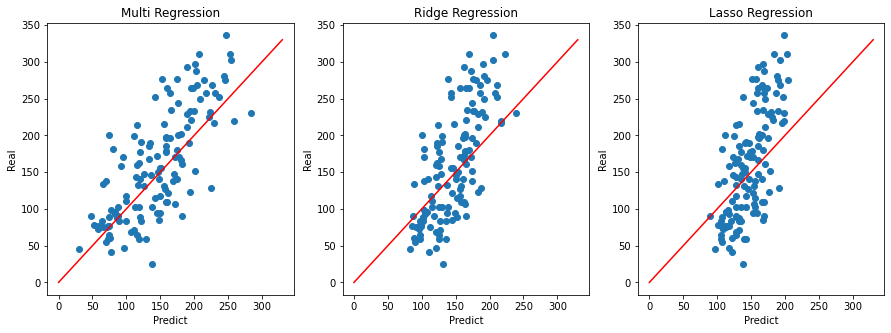

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
pred = [('Multi Regression', multi_test_pred),
       ('Ridge Regression', ridge_test_pred),
       ('Lasso Regression', lasso_test_pred)]

for idx, (name, test_pred) in enumerate(pred):
    ax = axes[idx]
    ax.scatter(test_pred, test_target)
    ax.plot(np.linspace(0, 330, 100), np.linspace(0,330, 100), color='red')
    ax.set_xlabel('Predict')
    ax.set_ylabel('Real')
    ax.set_title(name)